# MENTAL HEALTH DISORDERS.

Depression is a real mental health problem in all societies across all countries and there are other mental health disorders that have become prevelant in recent times. They affect one's mood and behaviour, and the effect depends on the level of the disorder one is On. The dataset we are about to analyse,clean and visualize contains information about the prevalence of mental health disorders in countries across the globe.

**list of mental health disoders in the data set:**

- Schizophrenia (%): Percentage of people with schizophrenia in that country/region during that year. (Float)
- Bipolar disorder (%): Percentage of people with bipolar disorder in that country/region during that year. (Float)
- Eating disorders (%): Percentage of people with eating disorders in that country/region during that year. (Float)
- Anxiety disorders (%): Percentage of people with anxiety disorders in that country/region during that year. (Float)
- Drug use disorders (%): Percentage of people with drug use disorders in that country/region during that year. (Float)
- Depression (%): Percentage of people with depression in that country/region during that year. (Float)
- Alcohol use disorders (%): Percentage of people with alcohol use disorders in that country/region during that year. (Float)



The dataset has an attribute "Code" that is related to the attribute "Entity". e.g The code AFG represents a country "AFghanistan".

**Reading data:**


In [1]:

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

data = pd.read_csv('Mental health Depression disorder Data.csv')

data.head(8)


C:\Users\keamo\AppData\Local\Temp\ipykernel_5472\2646149484.py:7: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Mental health Depression disorder Data.csv')


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
5,5,Afghanistan,AFG,1995,0.160076,0.698695,0.09098,4.828337,1.728112,4.104207,0.668746
6,6,Afghanistan,AFG,1996,0.160249,0.698914,0.089709,4.828083,1.737643,4.107500,0.667727
7,7,Afghanistan,AFG,1997,0.160554,0.699127,0.088372,4.827726,1.746891,4.110834,0.666220



The data in the dataset was recorded from 1990 till 2017 for each country that participated. some entries in "Schizophrenia (%)" and "Bipolar disorder 
(%)" are non-numerical, and it's a problem that needs fixing.


In [2]:

data.shape


(108553, 11)


The structure of the dataset comprises of 108553 rows/entries and 11 columns/attributes.



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB



We can see from the information above that there are missing entries for some attributes. Our analysis will be affected by these discrepencies, hence 
we need to clean our data. Some attributes are recorded to have "Object" data-type, which indicates that some of the entries are non-numerical values. 
We need to change the "object" data-type to "Float64" datatype.  


In [4]:
data.duplicated().sum()

0

The dataset has no duplicates.

In [5]:
data.isnull().sum()

index                             0
Entity                            0
Code                           5412
Year                              0
Schizophrenia (%)             82678
Bipolar disorder (%)          89147
Eating disorders (%)           8317
Anxiety disorders (%)        102085
Drug use disorders (%)       102085
Depression (%)               102085
Alcohol use disorders (%)    102085
dtype: int64

"Anxiety disorders", "Bipolar disorder" ,and "Depression" are some of the attributes that have significant amounts of missing entries. Since these are attribuetes with numerical values, we can place a **mean**,**mode** or **min** value **(depending on the skewness of the data)** as entries so that our analysis will not be heavily affected as compared t
o when we drop all the missing ventries.


In [9]:
data.describe()

,index,Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,108553.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,54276.000000,3.989921,0.862278,3.497654,1.585821
std,31336.696223,1.167526,0.460679,0.655859,0.860283
min,0.000000,2.023393,0.383650,2.139903,0.446940
25%,27138.000000,3.188824,0.535064,3.005529,0.993685
50%,54276.000000,3.554373,0.726430,3.499606,1.479936
75%,81414.000000,4.682163,0.940157,3.912381,1.867834
max,108552.000000,8.967330,3.452476,6.602754,5.474668


The above statistical descriprion does not include other attributes because they have non-numerical entries, and their datatypes are labelled as "object". we have to clean our data.

**data cleaning:**

In [13]:

data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')
data['Eating disorders (%)'] = pd.to_numeric(data['Eating disorders (%)'], errors='coerce')
data['Schizophrenia (%)'] = pd.to_numeric(data['Schizophrenia (%)'], errors='coerce')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')


We turned non-numerical entries and missing entries as NaN.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108410 non-null  float64
 4   Schizophrenia (%)          25872 non-null   float64
 5   Bipolar disorder (%)       19404 non-null   float64
 6   Eating disorders (%)       100234 non-null  float64
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 9.1+ MB


We changed datatypes of "Schizophrenia (%)" ,"Bipolar disorder (%)", and "Eating disorders (%)" from "objects" to "floats" 

In [17]:
data.isnull().sum()

index                             0
Entity                            0
Code                           5412
Year                            143
Schizophrenia (%)             82681
Bipolar disorder (%)          89149
Eating disorders (%)           8319
Anxiety disorders (%)        102085
Drug use disorders (%)       102085
Depression (%)               102085
Alcohol use disorders (%)    102085
dtype: int64

We still have missing entries/NaN values. We have to solve this problem.

In [19]:
data.describe()


,index,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,108553.000000,108410.000000,2.587200e+04,19404.000000,1.002340e+05,6468.000000,6468.000000,6468.000000,6468.000000
mean,54276.000000,1923.997842,1.101844e+06,1118.398074,2.790313e+07,3.989921,0.862278,3.497654,1.585821
std,31336.696223,88.583294,8.878369e+06,1617.890292,2.448924e+08,1.167526,0.460679,0.655859,0.860283
min,0.000000,0.000000,1.469020e-01,0.314535,7.390800e-02,2.023393,0.383650,2.139903,0.446940
25%,27138.000000,1867.000000,1.238871e+00,0.835064,1.080000e+05,3.188824,0.535064,3.005529,0.993685
50%,54276.000000,1936.000000,3.670748e+00,4.199842,1.252960e+06,3.554373,0.726430,3.499606,1.479936
75%,81414.000000,1992.000000,3.068042e+02,2885.210462,5.264643e+06,4.682163,0.940157,3.912381,1.867834
max,108552.000000,2019.000000,2.644556e+08,6096.437594,7.713468e+09,8.967330,3.452476,6.602754,5.474668


We are now able to see statistical descriptions for "Schizophrenia (%)",	"Bipolar disorder (%)",	"Eating disorders (%)".  

In [21]:

data['Year'] = data['Year'].fillna(data['Year'].median())
data['Schizophrenia (%)'] = data['Schizophrenia (%)'].fillna(data['Schizophrenia (%)'].median())
data['Bipolar disorder (%)'] = data['Bipolar disorder (%)'].fillna(data['Bipolar disorder (%)'].median())
data['Eating disorders (%)'] = data['Eating disorders (%)'].fillna(data['Eating disorders (%)'].median())
data['Anxiety disorders (%)'] = data['Anxiety disorders (%)'].fillna(data['Anxiety disorders (%)'].median())
data['Drug use disorders (%)'] = data['Drug use disorders (%)'].fillna(data['Drug use disorders (%)'].median())
data['Depression (%)'] = data['Depression (%)'].fillna(data['Depression (%)'].median())
data['Alcohol use disorders (%)'] = data['Alcohol use disorders (%)'].fillna(data['Alcohol use disorders (%)'].median())

data['Code']=data['Code'].astype(str)

We filled all the missing/NaN entries in every attribute that had them. We filled them with mean values of their respective attributes so that we don't significatnly affect the statistical description of the dataset.  

In [23]:
data.isnull().sum()

index                        0
Entity                       0
Code                         0
Year                         0
Schizophrenia (%)            0
Bipolar disorder (%)         0
Eating disorders (%)         0
Anxiety disorders (%)        0
Drug use disorders (%)       0
Depression (%)               0
Alcohol use disorders (%)    0
dtype: int64

We now have no missing entries/null values. 

In [25]:
data.describe()

,index,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,108553.000000,108553.000000,1.085530e+05,108553.000000,1.085530e+05,108553.000000,108553.000000,108553.000000,108553.000000
mean,54276.000000,1924.013652,2.626111e+05,203.364328,2.586079e+07,3.580325,0.734524,3.499490,1.486246
std,31336.696223,88.525998,4.359669e+06,806.299080,2.354284e+08,0.303047,0.116951,0.160083,0.211469
min,0.000000,0.000000,1.469020e-01,0.314535,7.390800e-02,2.023393,0.383650,2.139903,0.446940
25%,27138.000000,1867.000000,3.670748e+00,4.199842,1.408760e+05,3.554373,0.726430,3.499606,1.479936
50%,54276.000000,1936.000000,3.670748e+00,4.199842,1.252960e+06,3.554373,0.726430,3.499606,1.479936
75%,81414.000000,1992.000000,3.670748e+00,4.199842,4.662035e+06,3.554373,0.726430,3.499606,1.479936
max,108552.000000,2019.000000,2.644556e+08,6096.437594,7.713468e+09,8.967330,3.452476,6.602754,5.474668


The values in the table above did not change significantly, because we used the median of each attribute.

In [27]:
categorical_cols = data.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}': {unique_values}\n")

Unique values in 'Entity': ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andean Latin America'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australasia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Caribbean' 'Central African Republic' 'Central Asia'
 'Central Europe' 'Central Europe, Eastern Europe, and Central Asia'
 'Central Latin America' 'Central Sub-Saharan Africa' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Democratic Republic of Congo'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'East Asia'
 'Eastern Europe' 'Eastern Sub-Saharan Africa' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethi

There are no naming errors in the dataset.

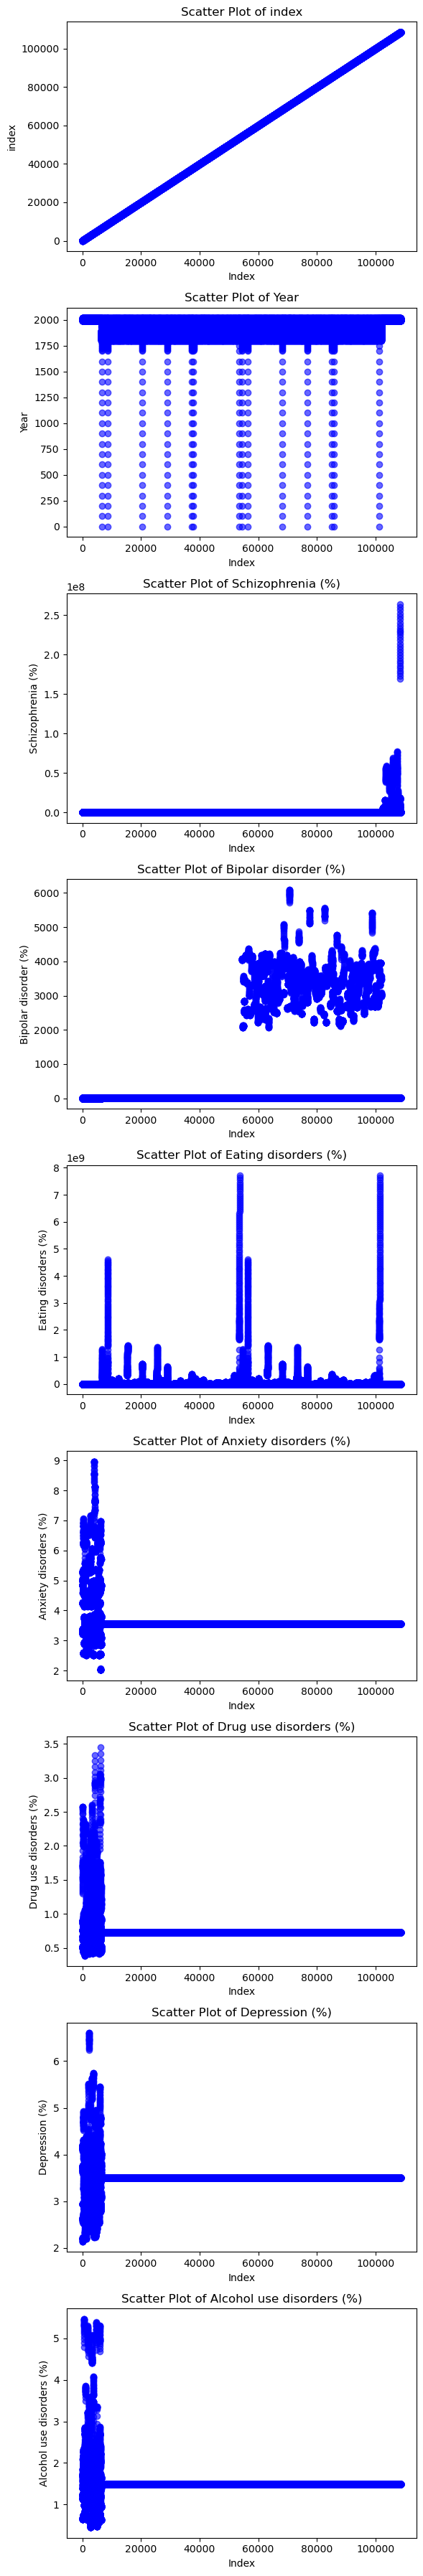

In [29]:
numeric_cols = data.select_dtypes(include=["number"]).columns
plt.figure(figsize=(6, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    plt.scatter(data.index, data[col], alpha=0.6, color="blue")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.title(f"Scatter Plot of {col}")

plt.tight_layout()
plt.show()

We can visualy observe that our dataset has **No Outliers**.
We have solved 4 main problems with regards to data cleaning, namely :**Missing values, Spelling errors, Duplicate entries,and Outliers**. We can conclude that our **DATA IS CLEAN**.

# DATA ANALYSIS

In [31]:
data.head(5)

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990.0,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991.0,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992.0,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993.0,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994.0,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [45]:
data.groupby('Year')['Schizophrenia (%)'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
0.0,12.0,3.670748e+00,1.391508e-15,3.670748,3.670748,3.670748,3.670748,3.670748e+00
1.0,2.0,3.670748e+00,0.000000e+00,3.670748,3.670748,3.670748,3.670748,3.670748e+00
100.0,14.0,3.670748e+00,1.382559e-15,3.670748,3.670748,3.670748,3.670748,3.670748e+00
200.0,14.0,3.670748e+00,1.382559e-15,3.670748,3.670748,3.670748,3.670748,3.670748e+00
300.0,14.0,3.670748e+00,1.382559e-15,3.670748,3.670748,3.670748,3.670748,3.670748e+00
...,...,...,...,...,...,...,...,...
2015.0,1012.0,1.191464e+06,9.990576e+06,0.148752,2.125849,3.670748,17.290722,2.563739e+08
2016.0,1012.0,1.209518e+06,1.014166e+07,0.148908,2.129931,3.670748,17.193830,2.603849e+08
2017.0,1012.0,1.227774e+06,1.029395e+07,0.149087,2.136973,3.670748,17.084906,2.644556e+08


In [47]:

data.groupby('Code')['Depression (%)'].describe()

,count,mean,std,min,25%,50%,75%,max
Code,,,,,,,,
ABW,140.0,3.499606,1.292483e-14,3.499606,3.499606,3.499606,3.499606,3.499606
AFG,496.0,3.534550,1.430677e-01,3.499606,3.499606,3.499606,3.499606,4.136347
AGO,496.0,3.538193,1.579890e-01,3.499606,3.499606,3.499606,3.499606,4.211842
AIA,140.0,3.499606,1.292483e-14,3.499606,3.499606,3.499606,3.499606,3.499606
ALB,496.0,3.425702,3.025185e-01,2.139903,3.499606,3.499606,3.499606,3.499606
...,...,...,...,...,...,...,...,...
YEM,496.0,3.528133,1.168010e-01,3.499606,3.499606,3.499606,3.499606,4.020945
ZAF,496.0,3.512214,5.187441e-02,3.499606,3.499606,3.499606,3.499606,3.767504
ZMB,496.0,3.502673,1.671163e-02,3.497006,3.499606,3.499606,3.499606,3.641811


**Visualization:**

C:\Users\keamo\AppData\Local\Temp\ipykernel_5472\305223615.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_Schizophrenia.values, y=avg_Schizophrenia.index, palette="Reds_r")


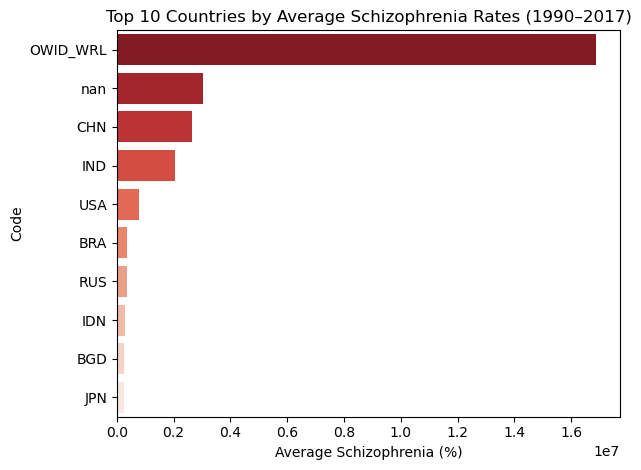

In [154]:
avg_Schizophrenia= data.groupby('Code')['Schizophrenia (%)'].mean().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=avg_Schizophrenia.values, y=avg_Schizophrenia.index, palette="Reds_r")
plt.title("Top 10 Countries by Average Schizophrenia Rates (1990–2017)")
plt.xlabel("Average Schizophrenia (%)")
plt.ylabel("Code")
plt.tight_layout()
plt.show()

"OWID_WRL", "nan" and "CHN" are codes for top 3 countries/regions with the Highest average Schizophrenia rates since 1990 till 2017.

C:\Users\keamo\AppData\Local\Temp\ipykernel_5472\2618070758.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_Alcohol_use_disorders.values, y=avg_Alcohol_use_disorders.index, palette="Reds_r")


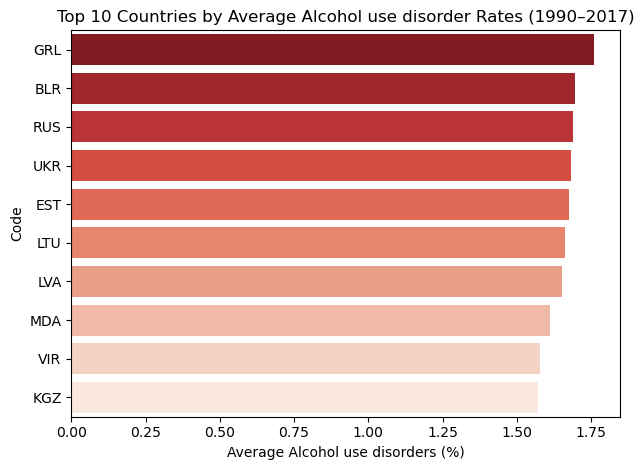

In [124]:
avg_Alcohol_use_disorders= data.groupby('Code')['Alcohol use disorders (%)'].mean().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=avg_Alcohol_use_disorders.values, y=avg_Alcohol_use_disorders.index, palette="Reds_r")
plt.title("Top 10 Countries by Average Alcohol use disorder Rates (1990–2017)")
plt.xlabel("Average Alcohol use disorders (%)")
plt.ylabel("Code")
plt.tight_layout()
plt.show()

"GRL", "BLR" and "RUS" are codes for top 3 countries/regions with the Highest average Alcohol-use-disoders rates since 1990 till 2017.

C:\Users\keamo\AppData\Local\Temp\ipykernel_5472\2370117101.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_Drug_use_disorders.values, y=avg_Drug_use_disorders.index, palette="Reds_r")


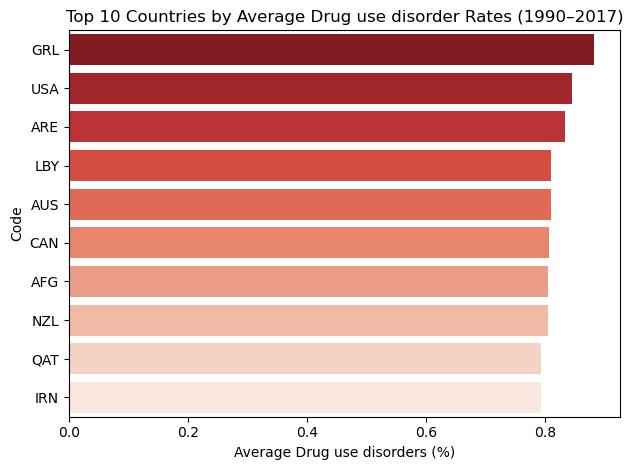

In [134]:
avg_Drug_use_disorders= data.groupby('Code')['Drug use disorders (%)'].mean().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=avg_Drug_use_disorders.values, y=avg_Drug_use_disorders.index, palette="Reds_r")
plt.title("Top 10 Countries by Average Drug use disorder Rates (1990–2017)")
plt.xlabel("Average Drug use disorders (%)")
plt.ylabel("Code")
plt.tight_layout()
plt.show()

""GRL", "USA" and "ARE" are codes for top 3 countries/regions with the Highest average Drug-use disorder rates since 1990 till 2017.

C:\Users\keamo\AppData\Local\Temp\ipykernel_5472\2146710314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_Eating_disorders.values, y=avg_Eating_disorders.index, palette="Reds_r")


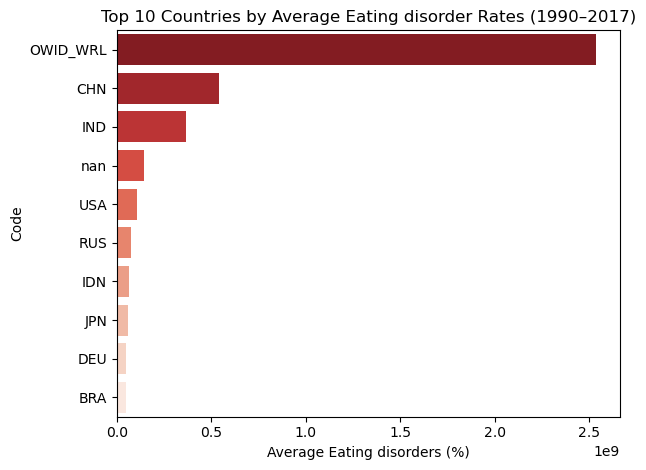

In [132]:
avg_Eating_disorders= data.groupby('Code')['Eating disorders (%)'].mean().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=avg_Eating_disorders.values, y=avg_Eating_disorders.index, palette="Reds_r")
plt.title("Top 10 Countries by Average Eating disorder Rates (1990–2017)")
plt.xlabel("Average Eating disorders (%)")
plt.ylabel("Code")
plt.tight_layout()
plt.show()

"OWID_WRL, "CHN" and "IND" are codes for top 3 countries/regions with the highest average Eating disorder rates since 1990 till 2017.

C:\Users\keamo\AppData\Local\Temp\ipykernel_5472\3648406841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_Bipolar_disorder.values, y=avg_Bipolar_disorder.index, palette="Reds_r")


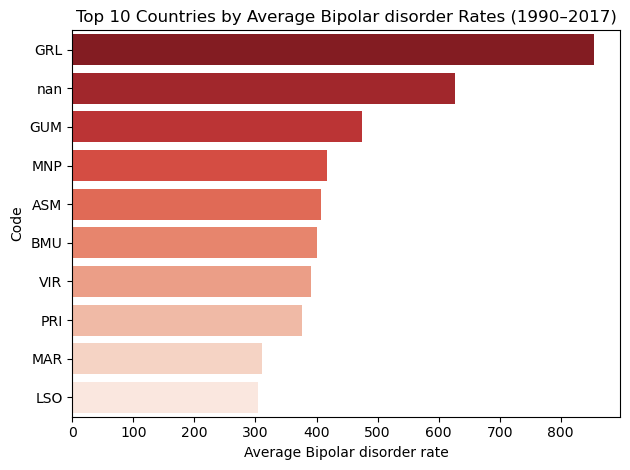

In [158]:
avg_Bipolar_disorder= data.groupby('Code')['Bipolar disorder (%)'].mean().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=avg_Bipolar_disorder.values, y=avg_Bipolar_disorder.index, palette="Reds_r")
plt.title("Top 10 Countries by Average Bipolar disorder Rates (1990–2017)")
plt.xlabel("Average Bipolar disorder rate")
plt.ylabel("Code")
plt.tight_layout()
plt.show()

""GRL", "nan" and "GUM" are codes for top 3 countries/regions with the worst average Bipolar disorder rates since 1990 till 2017.

C:\Users\keamo\AppData\Local\Temp\ipykernel_5472\466028159.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_depression.values, y=avg_depression.index, palette="Reds_r")


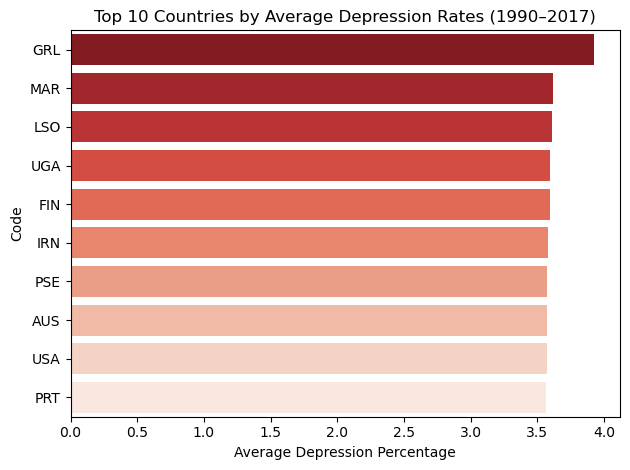

In [130]:
avg_depression = data.groupby('Code')['Depression (%)'].mean().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=avg_depression.values, y=avg_depression.index, palette="Reds_r")
plt.title("Top 10 Countries by Average Depression Rates (1990–2017)")
plt.xlabel("Average Depression Percentage")
plt.ylabel("Code")
plt.tight_layout()
plt.show()

"GRL", "MAR" and "LSO" are codes for top 3 countries/regions with the worst average depression rates since 1990 till 2017. There are many factors that cause such high depression rates such as socio-economic conditions of the country/region. 

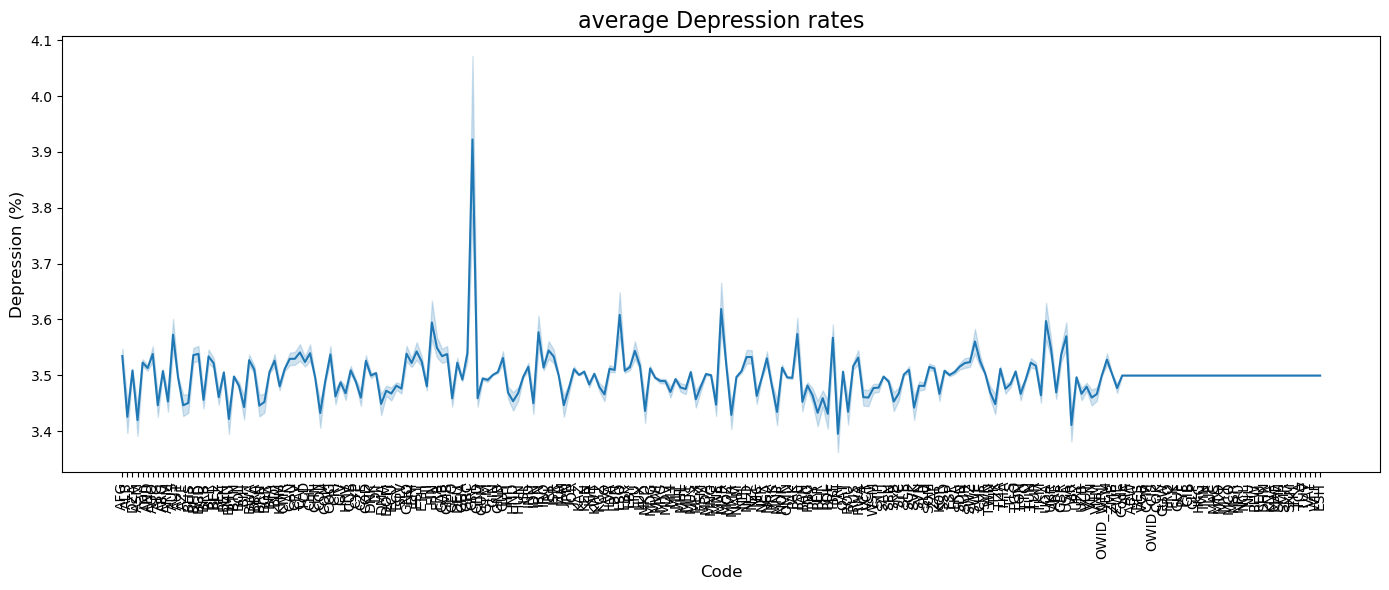

In [183]:
plt.figure(figsize=(14, 6))  
sns.lineplot(
    x='Code',
    y='Depression (%)',
    data=data
)

plt.title('average Depression rates', fontsize=16)
plt.xlabel('Code', fontsize=12)
plt.ylabel('Depression (%)', fontsize=12)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

# CONCLUSION

 The dataset has country/region codes for over 100 countries/regions. **"GRL"** Is a code for Greenland. This country has the **highest average depression (%), average drug use (%), average alcohol use (%) and Bipolar disorder** based on the diagrams above. Reasons for greenland to have such high percentages might be because they have a small population, harsh climate, geographical isolation and limited acces to health care. isolation is known to be one of the main contributors to mental health challenges hence greenland has high rates of such mental disorders. 
